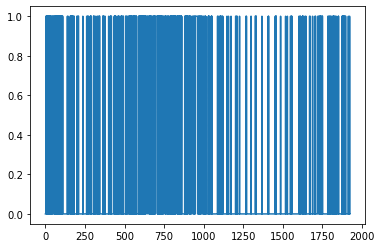

In [1]:
import os
import argparse
import numpy as np
from auditok import AudioRegion
import glob

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

roles = ['Yaw', 'Pitch', 'Thrust']

def encode_audio(speech_file):
    DEBUG = False
    plot_frequency = 100
    region = AudioRegion.load(speech_file)

    #manually switch min_dur, energy_threshold 0.02s, 20dB
    regions = region.split_and_plot(min_dur=0.02, energy_threshold=20, drop_trailing_silence=True, show=DEBUG)

    start_time_list = []
    end_time_list = []

    for idx in range(len(regions)):
        start_time_list.append(round(regions[idx].meta.start, 2))
        end_time_list.append(round(regions[idx].meta.end, 2))

    x = np.linspace(0, region.duration, int(plot_frequency * region.duration), endpoint=True)
    x = np.array([round(px, 2) for px in x])
    y = np.array([], np.int16)

    flag = False
    for idx in range(x.shape[0]):
        if x[idx] in start_time_list:
            y = np.append(y, 1)
            flag = True
        elif x[idx] in end_time_list:
            y = np.append(y, 1)
            flag = False
        elif flag is True:
            y = np.append(y, 1)
        else:
            y = np.append(y, 0)

    plt.close('all')
    plt.plot(x, y)
    plt.savefig('binary.png')

    return y
    #save this into a .csv
    #T14_Yaw_S1.csv


for file in glob.iglob('D:/Filtered_Speech/*.wav'):
    processed = encode_audio(file)
    filename = os.path.basename(file)
    out_name = "{trial}.csv"
    np.savetxt(out_name.format(trial=filename), processed, delimiter = ',')


